In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm
import re
import os
import random

In [39]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

pd.set_option('display.max_rows', None)

In [40]:
!pwd

/Users/yeorii/Desktop/KU/graduate/23-2/응용통계학특수연구2/프로젝트


# 1. 상장폐지기업

In [43]:
delist_corp = pd.read_excel('./data/상장폐지현황.xlsx', 
            dtype={'번호': int, '회사명': str, '종목코드': str, '폐지사유': str, '비고': str})

print(delist_corp.shape)
delist_corp.head(10)

(917, 6)


,번호,회사명,종목코드,폐지일자,폐지사유,비고
0,917,DB금융스팩9호,367360,2023-11-24,피흡수합병(스팩소멸합병),NaN
1,916,IBKS제17호스팩,405350,2023-11-03,피흡수합병(스팩소멸합병),NaN
2,915,케이비제23호스팩,440200,2023-11-03,피흡수합병(스팩소멸합병),NaN
3,914,루트로닉,085370,2023-10-27,타법인의 완전자회사로 편입,NaN
4,913,코스온,069110,2023-10-20,감사의견 거절(감사범위 제한),NaN
5,912,에이치엠씨제5호스팩,353060,2023-09-22,상장예비심사 청구서 미제출로 관리종목 지정 후 1개월 이내 동 사유 미해소,NaN
6,911,하나금융20호스팩,400560,2023-09-19,피흡수합병(스팩소멸합병),NaN
7,910,신한제7호스팩,366330,2023-09-18,피흡수합병(스팩소멸합병),NaN
8,909,유안타제8호스팩,367480,2023-09-08,피흡수합병(스팩소멸합병),NaN
9,908,한국제10호스팩,409570,2023-08-31,피흡수합병(스팩소멸합병),NaN


## 1.1 상장폐지 전처리

### 1.1.1. 상장폐지 사유 뜯어보기

In [44]:
상폐사유 = pd.DataFrame(delist_corp.폐지사유.value_counts(dropna=False).sort_index()).reset_index()
상폐사유.columns = ['폐지사유', 'cnt']
상폐사유.to_csv('상장폐지사유.csv', index=0)
상폐사유.head()

,폐지사유,cnt
0,'14사업연도 자본잠식률 50%이상 사유로 관리종목 지정 후 '15사업연도 반기 감...,2
1,'16사업연도 감사의견거절(계속기업 존속능력에 대한 불확실성) 및 '17사업연도 반...,1
2,- 2회연속 자본잠식률 50% 이상 - 2009.3.31 자본잠식률 50% 이상으로...,1
3,- 주된 영업이 정지되어 코스닥시장상장규정 제38조제2항제1호(삭제 ‘09.12.2...,1
4,-2회연속 자본잠식률 50%이상 -2회연속 자기자본 10억원미만 -자본잠식률 50%...,1


In [45]:
# 사유에 있는지 확인
keyword = '기타 등록취소'
print(상폐사유[상폐사유.폐지사유.str.contains(keyword)].cnt.sum())
상폐사유[상폐사유.폐지사유.str.contains(keyword)]
#delist_corp[delist_corp.폐지사유.str.contains(keyword)]

21


,폐지사유,cnt
115,기타 등록취소,10
124,"보고서미제출 , 기타 등록취소",1
183,"자본전액잠식(2년) , 기타 등록취소",4
226,"최종부도 또는 당좌거래정지(1년) , 기타 등록취소",1
227,"최종부도 또는 당좌거래정지(1년) , 기타 등록취소 , 자본전액잠식(2년)",1
228,"최종부도 또는 당좌거래정지(1년) , 보고서미제출 , 기타 등록취소 , 주식분산기준미달",1
230,"최종부도 또는 당좌거래정지(1년) , 자본전액잠식(2년) , 기타 등록취소",1
231,"최종부도 또는 당좌거래정지(1년) , 자본전액잠식(2년) , 기타 등록취소 , 주식...",1
232,"최종부도 또는 당좌거래정지(1년) , 주식분산기준미달 , 기타 등록취소",1


In [46]:
상폐사유drop1 = '상장폐지 신청|상장폐지신청|피흡수|완전자회사|취소신청|유가증권시장|증권거래소|자진|만료|양도'
상폐사유drop2 = ['기타 등록취소', '보고서미제출 , 기타 등록취소', '주식분산기분 미달', '주식분산기준 미달', '주식분산기준 미달 2년 연속', '주식분산기준미달']

상폐사유 = 상폐사유.loc[~상폐사유.폐지사유.str.contains(상폐사유drop1)]
상폐사유 = 상폐사유.loc[~상폐사유.폐지사유.isin(상폐사유drop2)]

상폐사유.head()

,폐지사유,cnt
0,'14사업연도 자본잠식률 50%이상 사유로 관리종목 지정 후 '15사업연도 반기 감...,2
1,'16사업연도 감사의견거절(계속기업 존속능력에 대한 불확실성) 및 '17사업연도 반...,1
2,- 2회연속 자본잠식률 50% 이상 - 2009.3.31 자본잠식률 50% 이상으로...,1
3,- 주된 영업이 정지되어 코스닥시장상장규정 제38조제2항제1호(삭제 ‘09.12.2...,1
4,-2회연속 자본잠식률 50%이상 -2회연속 자기자본 10억원미만 -자본잠식률 50%...,1


### 1.1.2 상장폐지 사유 중 부도와 관련 없는 것 제거

- 상장폐지 사유 중 부도와 직접적인 관련이 있
    -  부도발생 ⊃ 은행거래정지
    -  파산선고
    -  감사의견 거절
    -  회사정리절차개시(신청)
    -  화의절차개시신청
    -  감사인의 의견 거절
- 상장폐지 사유 중 부도와 직접적인 관련이 없
    - 신규/이전/변경 상장 (한국증권거래소, 증권거래소, 유가증권시장 상장)
    - 특수 목적에 의한 상장폐지
    - 피흡수합병
    - 완전자회사
    - 자진등록취소

In [47]:
# 사모펀드 및 합병용 회사, 부도와 관련 없는 상장폐지 기업 제거
상폐사유drop1 = '상장폐지 신청|상장폐지신청|피흡수|완전자회사|취소신청|유가증권시장|증권거래소|자진|만료|양도'
상폐사유drop2 = ['기타 등록취소', '보고서미제출 , 기타 등록취소', '주식분산기분 미달', '주식분산기준 미달', '주식분산기준 미달 2년 연속', '주식분산기준미달']

delist_corp = delist_corp.loc[~delist_corp.회사명.str.contains('스팩|1호|2호|3호|4호|5호|6호|7호|8호|9호|0호')]
delist_corp = delist_corp.loc[~delist_corp.폐지사유.str.contains(상폐사유drop1)]
delist_corp = delist_corp.loc[~delist_corp.폐지사유.isin(상폐사유drop2)]

delist_corp.head()

,번호,회사명,종목코드,폐지일자,폐지사유,비고
4,913,코스온,069110,2023-10-20,감사의견 거절(감사범위 제한),NaN
13,904,지나인제약,078650,2023-07-21,감사의견 거절(감사범위 제한 및 계속기업가정 불확실성),NaN
15,902,멜파스,096640,2023-07-17,기업의 계속성 및 경영의 투명성 등을 종합적으로 고려하여 상장폐지기준에 해당한다고 결정,NaN
19,898,엠피씨플러스,050540,2023-05-08,감사의견 거절(감사범위 제한),NaN
23,894,제이웨이,058420,2023-04-14,감사의견 거절(감사범위 제한 및 계속기업가정 불확실성),NaN


### 1.1.3 폐지일자 datetime으로

In [48]:
delist_corp['폐지일자'] = pd.to_datetime(delist_corp['폐지일자'])

## 1.2 상장폐지 기업 EDA

In [49]:
# 해당 연도부터 몇 개의 기업이 파업했는지?
yr = 2004
total_cnt = delist_corp.shape[0]
cnt = delist_corp[delist_corp.폐지일자.dt.year >= yr].shape[0]
print(f'전처리 후 {yr}년~2023년 코스닥 시장 상장폐지 기업 수: {cnt} / {total_cnt}')

전처리 후 2004년~2023년 코스닥 시장 상장폐지 기업 수: 449 / 621


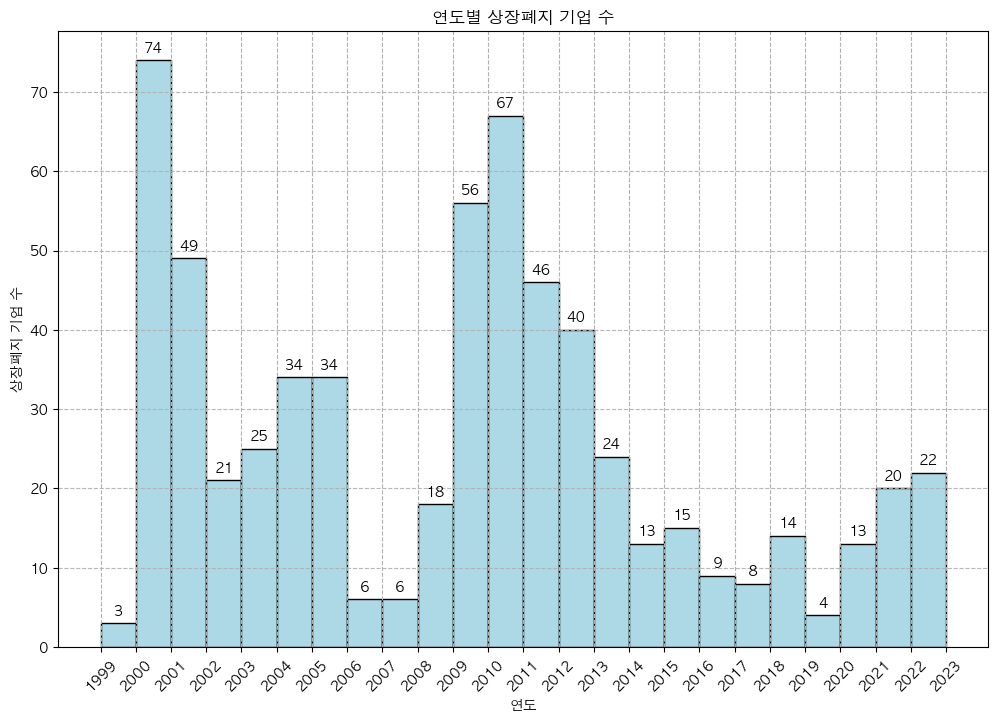

In [50]:
plt.figure(figsize=(12, 8))
hist = delist_corp['폐지일자'].dt.year.hist(bins=range(delist_corp['폐지일자'].dt.year.min(), delist_corp['폐지일자'].dt.year.max() + 1),\
    color='lightblue', edgecolor='black')

plt.title('연도별 상장폐지 기업 수')
plt.xlabel('연도')
plt.ylabel('상장폐지 기업 수')
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.grid(axis='x', linestyle='--', alpha=1)
plt.xticks(rotation=45)
plt.xticks(range(delist_corp['폐지일자'].dt.year.min(), delist_corp['폐지일자'].dt.year.max() + 1), rotation=45)


# Display counts above each bar
for p in hist.patches:
    plt.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()+1), ha='center', va='baseline')

plt.show()


# 2. 상장기업

In [55]:
list_corp = pd.read_excel('./data/상장법인목록.xlsx',
            dtype={'번호': int, '회사명': str, '종목코드': str, '폐지사유': str, '비고': str})
print(list_corp.shape)
list_corp.head(3)

(1701, 9)


,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,케이엔에스,432470,특수 목적용 기계 제조업,이차전지 자동화 설비,2023-12-06,12월,정봉진,http://knssystem.com,경기도
1,교보15호스팩,465320,금융 지원 서비스업,기업인수합병,2023-12-05,12월,김상도,NaN,서울특별시
2,와이바이오로직스,338840,자연과학 및 공학 연구개발업,항체의약품 및 항체후보물질 연구개발,2023-12-05,12월,"박영우, 장우익",http://ybiologics.com,대전광역시


## 2.1 상장기업 전처리

### 2.1.1 상장일 datetime으로

In [56]:
list_corp['상장일'] = pd.to_datetime(list_corp['상장일'])

### 2.1.2 사모펀드 기업 제거

In [57]:
list_corp = list_corp.loc[~list_corp.회사명.str.contains('스팩|1호|2호|3호|4호|5호|6호|7호|8호|9호|0호')]
print(list_corp.shape) # 85개 기업 제거

(1616, 9)


# 3. 기업 표본

## 3.1. 연도별 기업 표본 수

In [59]:
delist_yr = pd.DataFrame(delist_corp.폐지일자.dt.year.value_counts().sort_index(ascending=False)).reset_index()
delist_yr.columns = ['year', 'cnt']
delist_yr['cum_cnt'] = delist_yr.cnt.cumsum()
delist_yr

,year,cnt,cum_cnt
0,2023,7,7
1,2022,15,22
2,2021,20,42
3,2020,13,55
4,2019,4,59
5,2018,14,73
6,2017,8,81
7,2016,9,90
8,2015,15,105
9,2014,13,118


In [60]:
list_yr = pd.DataFrame(list_corp.상장일.dt.year.value_counts().sort_index()).reset_index()
list_yr.columns = ['year', 'cnt']
list_yr['cum_cnt'] = list_yr.cnt.cumsum()
list_yr

,year,cnt,cum_cnt
0,1989,5,5
1,1990,2,7
2,1991,4,11
3,1992,10,21
4,1993,17,38
5,1994,34,72
6,1995,14,86
7,1996,19,105
8,1997,37,142
9,1998,1,143


## 3.2. 기업 표본 절단

In [61]:
delist_cut_yr = 2013

delist_corp_cut = delist_corp.loc[delist_corp.폐지일자.dt.year >= delist_cut_yr,\
    ['회사명', '종목코드', '폐지일자']]
delist_corp_cut = delist_corp_cut[delist_corp_cut.폐지일자.dt.year <= 2023]
delist_corp_cut.columns = ['회사명', '종목코드', '폐지일']
delist_corp_cut.head()

,회사명,종목코드,폐지일
4,코스온,069110,2023-10-20
13,지나인제약,078650,2023-07-21
15,멜파스,096640,2023-07-17
19,엠피씨플러스,050540,2023-05-08
23,제이웨이,058420,2023-04-14


In [62]:
list_cut_yr = 2021

list_corp_cut = list_corp.loc[list_corp.상장일.dt.year <= list_cut_yr,\
    ['회사명', '종목코드', '상장일']]
list_corp_cut.head()

,회사명,종목코드,상장일
235,래몽래인,200350,2021-12-30
238,툴젠,199800,2021-12-10
239,마음AI,377480,2021-11-23
240,알비더블유,361570,2021-11-22
241,바이옵트로,222160,2021-11-18


# 4. 상장폐지기업 상장일 조인

In [63]:
delist_corp_list = pd.read_csv('./data/상장폐지_상장일포함.csv', encoding='cp949')
delist_corp_list = delist_corp_list[['종목명', '상장일']]
delist_corp_list.columns = ['회사명', '상장일']
delist_corp_list['상장일'] = pd.to_datetime(delist_corp_list['상장일'])
#delist_corp_list['폐지일'] = pd.to_datetime(delist_corp_list['폐지일'])
delist_corp_list.head(3)

,회사명,상장일
0,3S R,2012-05-14
1,BGF에코머티리얼즈 12R,2023-07-21
2,C&S자산관리 34R,2017-02-02


In [64]:
delist_corp_cut = pd.merge(delist_corp_cut, delist_corp_list, on='회사명', how='left')
delist_corp_cut.head()

,회사명,종목코드,폐지일,상장일
0,코스온,069110,2023-10-20,2003-10-14
1,지나인제약,078650,2023-07-21,2010-10-22
2,멜파스,096640,2023-07-17,2009-12-18
3,엠피씨플러스,050540,2023-05-08,2005-12-12
4,제이웨이,058420,2023-04-14,2002-01-10


In [65]:
corp_list_null = delist_corp_cut.loc[delist_corp_cut.상장일.isnull(), '회사명'].to_list()
corp_list_null

['화신테크', '오상헬스케어', '뉴아세아', '엔터미디어', '에스비아이앤솔로몬스']

In [66]:
delist_corp_cut[delist_corp_cut.회사명.isin(corp_list_null)]

,회사명,종목코드,폐지일,상장일
30,화신테크,086250,2021-08-31,NaT
86,오상헬스케어,036220,2016-05-09,NaT
105,뉴아세아,013340,2014-09-02,NaT
137,엔터미디어,068420,2013-04-06,NaT
138,에스비아이앤솔로몬스,123910,2013-03-29,NaT


In [67]:
corp_list_null_dt = ['2006-11-10', # 화신테크 == 이노와이즈
                    '2007-06-05', # 오상헬스케어 == 인포피아
                    '1989-09-06', # 뉴아세아 == AJS
                    '2003-07-01', # 엔터미디어 == 엔터기술
                    '2010-08-24'] # 에스비아이앤솔로몬스 == 에스비아이앤솔로몬스팩

In [68]:
for i in range(5):
    delist_corp_cut.loc[delist_corp_cut.회사명 == corp_list_null[i], '상장일'] = corp_list_null_dt[i]

In [69]:
# 스팩 기업
delist_corp_cut = delist_corp_cut[delist_corp_cut.회사명!='에스비아이앤솔로몬스']

In [70]:
sum(delist_corp_cut.상장일.isnull())

0

In [71]:
delist_corp_cut['상장일'] = pd.to_datetime(delist_corp_cut['상장일'])

# 5. 지속기간 컬럼 만들기

In [72]:
delist_corp_cut['지속기간'] = delist_corp_cut['폐지일'] - delist_corp_cut['상장일']
list_corp_cut['지속기간'] = pd.to_datetime('2023-10-31') - list_corp_cut['상장일']

In [73]:
# 365일 이상 지속기간인 기업들만 남기기
list_corp_cut = list_corp_cut[list_corp_cut.지속기간 >= pd.Timedelta(days=365)]

In [74]:
delist_corp_cut.columns = ['기업명', '종목코드', '폐지일', '상장일', '지속기간']
list_corp_cut.columns = ['기업명', '종목코드', '상장일', '지속기간']

In [75]:
delist_corp_cut.head()

,기업명,종목코드,폐지일,상장일,지속기간
0,코스온,069110,2023-10-20,2003-10-14,7311 days
1,지나인제약,078650,2023-07-21,2010-10-22,4655 days
2,멜파스,096640,2023-07-17,2009-12-18,4959 days
3,엠피씨플러스,050540,2023-05-08,2005-12-12,6356 days
4,제이웨이,058420,2023-04-14,2002-01-10,7764 days


In [76]:
list_corp_cut.head()

,기업명,종목코드,상장일,지속기간
235,래몽래인,200350,2021-12-30,670 days
238,툴젠,199800,2021-12-10,690 days
239,마음AI,377480,2021-11-23,707 days
240,알비더블유,361570,2021-11-22,708 days
241,바이옵트로,222160,2021-11-18,712 days


In [77]:
print(f'{delist_cut_yr} ~ 2023년 상장폐지기업 표본 수: {delist_corp_cut.shape[0]} 개')
print(f'1989 ~ {list_cut_yr}년 상장기업 표본 수: {list_corp_cut.shape[0]} 개')

2013 ~ 2023년 상장폐지기업 표본 수: 141 개
1989 ~ 2021년 상장기업 표본 수: 1455 개


In [78]:
delist_corp_cut.to_csv('./data/부도기업.csv', index=False)
list_corp_cut.to_csv('./data/정상기업.csv', index=False)

In [79]:
delist_corp_cut

,기업명,종목코드,폐지일,상장일,지속기간
0,코스온,069110,2023-10-20,2003-10-14,7311 days
1,지나인제약,078650,2023-07-21,2010-10-22,4655 days
2,멜파스,096640,2023-07-17,2009-12-18,4959 days
3,엠피씨플러스,050540,2023-05-08,2005-12-12,6356 days
4,제이웨이,058420,2023-04-14,2002-01-10,7764 days
5,코원플레이,056000,2023-03-30,2003-07-11,7202 days
6,유네코,064510,2023-01-17,2018-03-15,1769 days
7,참존글로벌,158310,2022-11-09,2013-04-03,3507 days
8,레드로버,060300,2022-11-04,2002-01-10,7603 days
9,뉴로스,126870,2022-10-26,2012-02-15,3906 days
